# Aufgabe 9
## Aufgabenteil a)

Zu zeigen ist, dass der Metropolis-Hastings-Algorithmus (MHA) bei einer gaußförmigen Schrittsvorschlags-PDF in den Metropolis-Algorithmus (MA) übergeht. Das Ziel des MHA ist es, Zufallszahlen zu generieren, die der Zielverteilung mit PDF f(x) folgen. Dabei wird eine Folge von Zufallszahlen ${x_i}$ generiert. Der Übergang zur nächsten Zahl ist dabei nicht garantiert, er geschieht mit der Übergangswahrscheinlichhkeit $ M_{i\rightarrow j} = \text{min}\left(1, \frac{f\left(x_j\right)}{f\left(x_i\right)}\frac{g\left(x_j|x_i\right)}{g\left(x_i|x_j\right)}\right)$, wobei $x_j$ eine vorgeschlagene Zufallszahl ist, die bei Annahme das neue Glied der Folge wird. Praktisch wird diese Übergangswahrscheinlichkeit damit realisiert, dass der zweite Wert im Minimum mit einer Zufallszahl zwischen 0 und 1 verglichen wird, falls dieser zweite Wert kleiner als eins ist. Das $g$ in der Formel für die Übergangswahrscheinlichkeit ist die nicht notwendigerweise symmetrische Schrittvorschlags-PDF, die im einfachsten Fall eine Gleichverteilung ist. Sie kann allerdings auch komplizierter sein. 
Der Term $g\left(x_i|x_j\right) = g_{i \rightarrow j}$ ist so zu verstehen: Er beschreibt eine Übergangswahrscheinlichkeit aus dem Zustand $x_j$ in den Zustand $x_i$. Bei einer Gaußverteilung ergibt sich dann
\begin{equation}
g\left(x_i|x_j\right) = N \, \exp(-(x_i-x_j)^2)
\end{equation}
als allgemeiner Zusammenhang mit $N$ als Normierungskonstante. Dabei ist $x_j$ als Mittelwert der Verteilung zu verstehen, sie ist also um $x_j$ zentriert. Es folgt auch
\begin{equation}
g\left(x_j|x_i\right) = N \, \exp(-(x_j-x_i)^2)
\end{equation}
für die Übergangswahrscheinlichkeit in die andere Richtung, also von $x_i$ nach $x_j$. Da die Reihenfolge der Summanden irrelevant ist, falls sie quadriert werden, folgt sofort $g\left(x_j|x_i\right) = g\left(x_i|x_j\right)$. Die Übergangswahrscheinlichkeit ist dann $ M_{i\rightarrow j} = \text{min}\left(1, \frac{f\left(x_j\right)}{f\left(x_i\right)}\right)$, da sich die beiden g-Terme herauskürzen, weil sie gleich sind. Das ist jedoch gerade die Übergangswahrscheinlichkeit des MA, wodurch die Behauptung gezeigt werden konnte. Das Ergebnis sollte auch anschaulich klar sein, da das $\frac{g\left(x_j|x_i\right)}{g\left(x_i|x_j\right)}$ ein Korrekturfaktor für eine nicht-symmetrische Schrittvorschlags-PDF darstellt. Dieser wird nicht mehr benötigt, weil die Gaußverteilung symmetrisch ist.

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


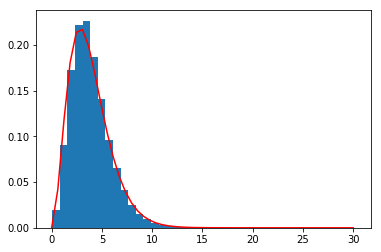

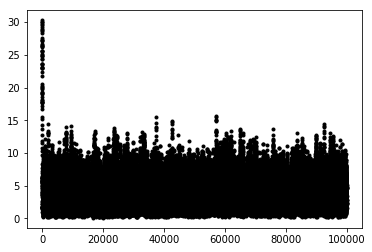

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random


#Targetverteilung
def target(x):
    if x<=0:
        return 0
    else:
        return 15/np.pi**4 * x**3/(np.exp(x)-1)

x = []
x_0 = 30 #Startwert
step_size = 2 #Schrittweite
n = 10**5 #Menge an Zufallzahlen
x.append(x_0)

#Metropolis-Algorithmus
i=0
while i<n:
    currentx = x[i]
    proposedx = currentx + (random.random()*2-1)*step_size 
    A = target(proposedx)/target(currentx)
    
    if(random.random()<A): 
        x.append(proposedx)
        i+=1

z = np.linspace(0.001,30)
plt.plot(z, 15/np.pi**4 * z**3/(np.exp(z)-1), 'r-')
plt.hist(x, bins=40, normed=1)
plt.show()
plt.clf()

plt.plot(np.linspace(0,n,n+1), x, 'k.')

plt.show()